# **An Introduction to PROTACs**


### David Zhang and David Figueroa

PROTACs represent an emerging wave of new therapeutics capable of modulating proteins once thought nearly impossible to target. By eliminating rather than merely inhibiting disease-causing proteins, PROTACs address the limitations of existing drug modalities. As PROTACs progress through clinical trials with promising results, there is growing anticipation surrounding their therapeutic potential.

This DeepChem tutorial serves as a starting point for exploring the world of PROTACs and the exciting field of targeted protein degradation. The tutorial is divided into five partitions:
1. Background literature
2. Data extraction
3. Featurization
4. Model deployment
5. References

With that in mind, let's jump into how we can predict efficacy of PROTAC degraders!


## 1. Background literature

Traditional drug modalities, such as small-molecule drugs or monoclonal antibodies, are limited to certain modes of action, like targeting specific receptors or blocking particular pathways. Targeted protein degradation (TPD) represents a promising new approach to modulate proteins that have been traditionally difficult to target. TPD has given rise to major classes of molecules that have emerged as promising therapeutic approaches against various disease contexts.



### 1.1 Targeted protein degradation

Targeted protein degradation represents a way of leveraging the cell's natural degradation mechanisms to target disease causing proteins. Typically, the cell maintains protein homeostasis through clearance by proteasomes or lysosomes. By leveraging these intrinsic cellular mechanisms, TPD methods can target a variety of proteins throughout the cell. This has given rise to a collection of TPD methods aimed at degrading proteins that may play roles across many disease states. One of these major class of molecules is proteolysis-targeting chimera (PROTACs).


### 1.2 How do PROTACs work?

PROTAC molecules are ternary structures consisting of a linker, a ligand to recruit and bind to the target protein, and a ligand to recruit the E3 ubiquitin ligase. Before we dive into how PROTACs mediate this degradation mechanism, it is crucial to understand the underlying biological pathway that makes this all possible.

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs12943-022-01707-5/MediaObjects/12943_2022_1707_Fig14_HTML.png?as=webp" alt="protac_structures.png" width="700" height="550">

**Figure 1:** Molecular structure of PROTACs molecules designed to inhibit epidermal growth factor receptor (EGFR). The PROTAC linker connects the EGFR ligand and E3 ligase which are highlighted in yellow and gray, respectively [[1]](#1).


#### 1.1.1 Ubiquitin Proteasome System

The ubiquitin proteasome system, or UPS for short, is a crucial cellular maintenance mechanism. Ubiquitin-dependent proteolysis is a three-step process which involves ubiquitin-activating enzymes (E1), ubiquitin-conjugate enzymes (E2), and ubiquitin-protein ligases (E3). In general, E1 activates ubiquitin, priming it for transfer to E2 which interacts with E3 at which point E3 ligases are responsible for binding of the target protein substrate for subsequent ubiquitination by E2. Once the protein is tagged with a polyubiquitin chain, it is recognized by the proteasome, a large protease complex that degrades that protein into peptides.  

![ups.png](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3466981/bin/ijcep0005-0726-f1.jpg)

**Figure 2:** The ubiquitin proteasome system is one of the cell's internal degradation mechanism crucial for targetting dysfunctional proteins. Naturally this opens up opportunities to leverage this in a therapeutic context [[2]](#2).



#### 1.1.2 Connection to PROTACs

The realization that the UPS could be leveraged for therapeutic purposes was initially made through early studies of viruses and plants. The underlying idea involves design of small molecules capable of recruiting the E3 ligase and inducing degradation of a protein of interest (POI). This general idea naturally extended itself to the case of PROTACs. Together, the POI ligand, linker, and E3 ligase ligand make up the PROTAC complex responsible for protein degradation. Note that the presence of two ligands enables simultaneous  recruitment of the E3 ligase and POI, hence its heterobifunctionality property.

Furthermore, after the POI is degraded by the proteasome, PROTACs can disassociate and continue to induce further degradation, enabling low concentrations to be efficacious. This catalytic mechanism of action and event-drive pharmacology prevents PROTACs from suffering the same limitations as conventional therapeutic strategies such as drug resistance and off-target effects.

![protac.png](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41392-019-0101-6/MediaObjects/41392_2019_101_Fig1_HTML.png?as=webp)

**Figure 3:** The mechanism of action of PROTACs center around the UPS. In a heterobifunctional manner, recruiting both a target protein of interest and an E3 ligase, PROTACs are able to promote protein degradation in diseases [[3]](#3).

### 1.3 Other TPD methods

It is worth noting that PROTACs are not the only TPD method. Another major class which which also leverages the UPS to elicit degradation are molecular glues. As implied by its name, molecular glues stabilize protein-protein interactions between the target protein and E3 ligase. Notice how this is different than PROTACs which consists of two separate binding ligands connected by a linker. Naturally molecular glues may be less sterically hindered but harder to design.


<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0960894X18303585-fx1_lrg.jpg" alt="protac_structures.png" width="750" height="400">


**Figure 4:** Lenalidomide is a molecular glue which mediates the interaction between CRBN, an E3 ligase, and CK1α, resulting in subsequent ubiquitination. [[4]](#4)

### 1.4 How can we leverage machine learning?

As a novel and promising technique, PROTACs have demonstrated positive clinical results thus far. However, much of the clinical validation has been against classically drugged targets. In order for PROTACs to reach their full potential, their clinical efficacy against novel or hard to reach targets must be demonstrated. Consequently, there has been growing research in designing PROTAC molecules capable of elicting an effective response. However, much of the current work is empirical and requires extensive trial-and-error processes. Machine learning could potentially revolutionize this. By correlating molecular structure with physiochemical properties and biological activity, we could potentially streamline the discovery process, significantly reducing the time and cost associated with validation. With that in mind, let's jump into this tutorial to predict efficacy of PROTAC degraders!




For a more in-depth dive into PROTACs, ubiquitin proteasome system, and targeted protein degradation, readers are referred to [[5]](#5) and [[6]](#6).


## 2. Data extraction

Before we proceed, let's install deepchem into our colab environment.


In [1]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 12.6 MB/s eta 0:00:00


Now let's download this dataset on PROTACs, curated by [[7]](#7), which includes 3270 PROTACs.

In [2]:
import deepchem as dc
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [3]:
os.system('wget https://deepchemdata.s3.us-west-1.amazonaws.com/datasets/protac_10_06_24.csv')

0

In [4]:
protac_db = pd.read_csv('protac_10_06_24.csv')

Taking a closer look at the dataset, each PROTAC compound has a SMILEs representation along with its target protein of interest and E3 ligase.

In [ ]:
# Note that the same PROTAC compound can have the same target protein of interest (POI)
print('There are {} unique PROTAC compounds, targeting {} proteins for a total of {} combinations'.format(len(protac_db['Compound ID'].unique()),
                                                                                   len(protac_db['Target'].unique()), protac_db.shape[0]))
protac_db

There are 3270 unique PROTAC compounds, targeting 323 proteins for a total of 5388 combinations


,Compound ID,Uniprot,Target,E3 ligase,PDB,Name,Smiles,DC50 (nM),Dmax (%),Assay (DC50/Dmax),...,XLogP3,Heavy Atom Count,Ring Count,Hydrogen Bond Acceptor Count,Hydrogen Bond Donor Count,Rotatable Bond Count,Topological Polar Surface Area,Molecular Formula,InChI,InChI Key
0,1,Q9NPI1,BRD7,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,3.03,68,7,15,3,19,189.92,C50H64N8O9S,InChI=1S/C50H64N8O9S/c1-32-45(68-31-53-32)34-1...,RPMQBLMPGMFXLD-PDUNVWSESA-N
1,1,Q9H8M2,BRD9,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,3.03,68,7,15,3,19,189.92,C50H64N8O9S,InChI=1S/C50H64N8O9S/c1-32-45(68-31-53-32)34-1...,RPMQBLMPGMFXLD-PDUNVWSESA-N
2,2,Q9NPI1,BRD7,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,2.74,74,7,17,3,25,208.38,C54H72N8O11S,InChI=1S/C54H72N8O11S/c1-36-49(74-35-57-36)38-...,NGWWVKZONFCNQP-SHPBXJAASA-N
3,2,Q9H8M2,BRD9,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,2.74,74,7,17,3,25,208.38,C54H72N8O11S,InChI=1S/C54H72N8O11S/c1-36-49(74-35-57-36)38-...,NGWWVKZONFCNQP-SHPBXJAASA-N
4,3,Q9H8M2,BRD9,CRBN,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,0.70,61,7,15,3,18,202.97,C43H50N8O10,InChI=1S/C43H50N8O10/c1-48-24-31(28-9-10-44-23...,RMBNUDOJPQLHMV-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5383,3266,O60885,BRD4,FEM1B,NaN,NaN,CC1=C(C)C2=C(S1)N1C(C)=NN=C1[C@H](CC(=O)NCCOCC...,1600,80,Degradation of BRD4 in HEK293T cells after 8 h...,...,3.28,64,6,15,2,24,194.76,C44H53Cl2N9O8S,InChI=1S/C44H53Cl2N9O8S/c1-29-30(2)64-44-41(29...,UUCUKSPUFPMKNK-DHUJRADRSA-N
5384,3267,NaN,BCR-ABL,FEM1B,NaN,NaN,CC1=NC(NC2=NC=C(C(=O)NC3=C(C)C=CC=C3Cl)S2)=CC(...,NaN,NaN,NaN,...,5.92,58,6,13,3,17,171.95,C40H47Cl2N11O4S,InChI=1S/C40H47Cl2N11O4S/c1-27-8-6-9-30(42)38(...,WIXPXNLUXBZCHT-UHFFFAOYSA-N
5385,3268,NaN,BCR-ABL,FEM1B,NaN,NaN,CC1=NC(NC2=NC=C(C(=O)NC3=C(C)C=CC=C3Cl)S2)=CC(...,NaN,NaN,NaN,...,4.41,64,6,16,3,23,199.64,C43H53Cl2N11O7S,InChI=1S/C43H53Cl2N11O7S/c1-30-5-3-6-33(45)41(...,YPMQMBLMNGXVCK-UHFFFAOYSA-N
5386,3269,P03372,ER,CRBN,NaN,ARV-471,O=C1CC[C@H](N2CC3=CC(N4CCN(CC5CCN(C6=CC=C([C@@...,2,NaN,Degradation of ER in ER-positive breast cancer...,...,6.36,54,9,7,2,7,96.43,C45H49N5O4,InChI=1S/C45H49N5O4/c51-37-12-15-39-33(27-37)8...,TZZDVPMABRWKIZ-XMOGEVODSA-N


In general, PROTAC-DB contains information for a variety of different physiochemical and biochemical properties of PROTAC structures. Several useful ones to point out are $ΔG$, which describes the spontaneity of a chemical reaction, and $K_d$ which measures the affinity of a ligand to its receptor. Note that these properties are all used in the context of describing the biochemical interactions between the PROTAC, target protein, and E3 ligase which react to form a ternary complex. $XLogP3$ is also a useful physiochemical property which measures a compound's solubility, an indication of its absorption and distribution characteristics. Before we proceed, let's plot the distribution of each of these properties to get a better sense of our PROTAC dataset.

In [ ]:
protac_db.columns

Index(['Compound ID', 'Uniprot', 'Target', 'E3 ligase', 'PDB', 'Name',
       'Smiles', 'DC50 (nM)', 'Dmax (%)', 'Assay (DC50/Dmax)',
       'Percent degradation (%)', 'Assay (Percent degradation)',
       'IC50 (nM, Protac to Target)', 'Assay (Protac to Target, IC50)',
       'EC50 (nM, Protac to Target)', 'Assay (Protac to Target, EC50)',
       'Kd (nM, Protac to Target)', 'Assay (Protac to Target, Kd)',
       'Ki (nM, Protac to Target)', 'Assay (Protac to Target, Ki)',
       'delta G (kcal/mol, Protac to Target)',
       'delta H (kcal/mol, Protac to Target)',
       '-T*delta S (kcal/mol, Protac to Target)',
       'Assay (Protac to Target, G/H/-TS)', 'kon (1/Ms, Protac to Target)',
       'koff (1/s, Protac to Target)', 't1/2 (s, Protac to Target)',
       'Assay (Protac to Target, kon/koff/t1/2)', 'IC50 (nM, Protac to E3)',
       'Assay (Protac to E3, IC50)', 'EC50 (nM, Protac to E3)',
       'Assay (Protac to E3, EC50)', 'Kd (nM, Protac to E3)',
       'Assay (Protac to E3, 

[]

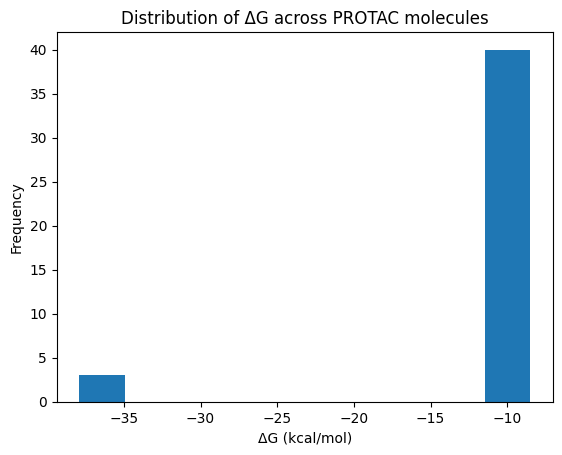

In [ ]:
delta_G = protac_db['delta G (kcal/mol, Protac to E3)']
delta_G = delta_G.dropna()
delta_G = delta_G.astype(float)
plt.hist(delta_G, bins=10)
plt.xlabel('ΔG (kcal/mol)')
plt.ylabel('Frequency')
plt.title(f'Distribution of ΔG across PROTAC molecules')
plt.plot()

There does not appear to be a lot of information on the spontaneity of PROTAC reactions but it is worth noting that the ones with recorded ΔGs appear energetically favorable, as expected.

[]

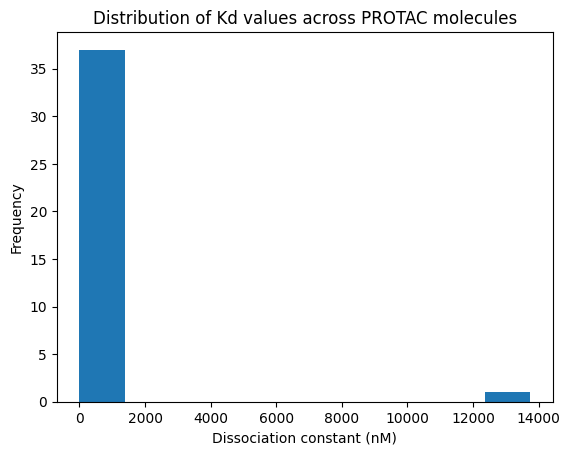

In [ ]:
kd_data = protac_db['Kd (nM, Ternary complex)']
kd_data = kd_data.dropna()
kd_data = kd_data[~kd_data.str.contains('/')]
kd_data = kd_data.astype(float)
plt.hist(kd_data)
plt.xlabel('Dissociation constant (nM)')
plt.ylabel('Frequency')
plt.title('Distribution of Kd values across PROTAC molecules')
plt.plot()

Similar to ΔG values, there does not appear to be a lot of information on the affinity of formed PROTAC complexes. However, we do see that a number of them have low, favorable $K_d$ values indicating that the PROTAC linker can form a strong connection with the E3 ligase and target protein.

[]

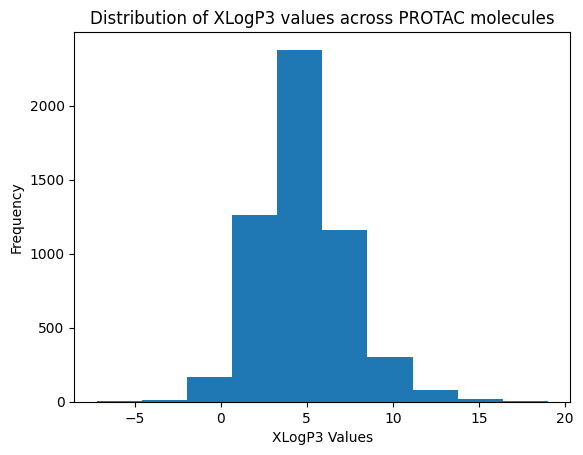

In [ ]:
plt.hist(protac_db['XLogP3'])
plt.xlabel('XLogP3 Values')
plt.ylabel('Frequency')
plt.title('Distribution of XLogP3 values across PROTAC molecules')
plt.plot()

All PROTAC compounds have a recorded XLogP3 value. Recall that XLogP3 estimates a compound's liphophilicity, giving insight into how a compound may behave in biological systems. The distribution looks normally distributed with few molecules with extreme logP profiles.  

Now, let's take a look at the PROTAC degradation properties. "DC50 (nM)" and "Dmax (%)"  represent the half maximal degradation concentration and maximal degradation of the target protein of interest, respectively. Let's take a quick look at their distributions.

Let's first do some data cleaning

In [5]:
# Let's first drop all the NaN values
raw_dc50 = protac_db['DC50 (nM)']
raw_dc50 = raw_dc50.dropna()

Notice that the values are all in string format with non-numerical characters such as '<', '/', and '>'. For the time being, let's remove these values.

In [6]:
raw_dc50 = raw_dc50[~raw_dc50.str.contains('<|>|/|~|-')]
raw_dc50 = raw_dc50.astype(float)

[]

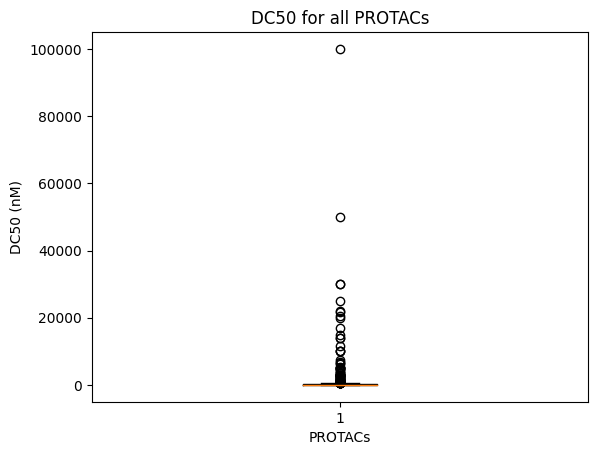

In [ ]:
plt.boxplot(raw_dc50.values)
plt.xlabel('PROTACs')
plt.ylabel('DC50 (nM)')
plt.title('DC50 for all PROTACs')
plt.plot()

The distribution is certainly skewed and has a few outliers. Let's log normalize.

In [7]:
lognorm_dc50 = np.log(raw_dc50)

[]

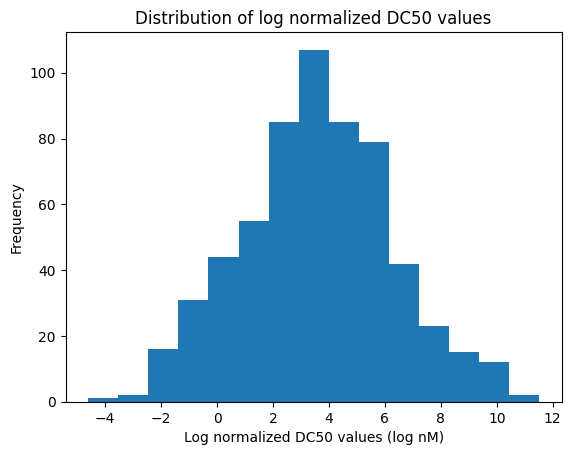

In [8]:
plt.hist(lognorm_dc50, bins=15)
plt.xlabel('Log normalized DC50 values (log nM)')
plt.ylabel('Frequency')
plt.title('Distribution of log normalized DC50 values')
plt.plot()

Now, let's take a look at Dmax.

In [ ]:
# Using the same row indices as our cleaned DC50 data
dmax = protac_db.iloc[lognorm_dc50.index]['Dmax (%)']

In [ ]:
# Following the same data cleaning procedure:
dmax = dmax.dropna()
dmax = dmax[~dmax.str.contains('<|>|/|~|-')]
dmax = dmax.astype(float)

[]

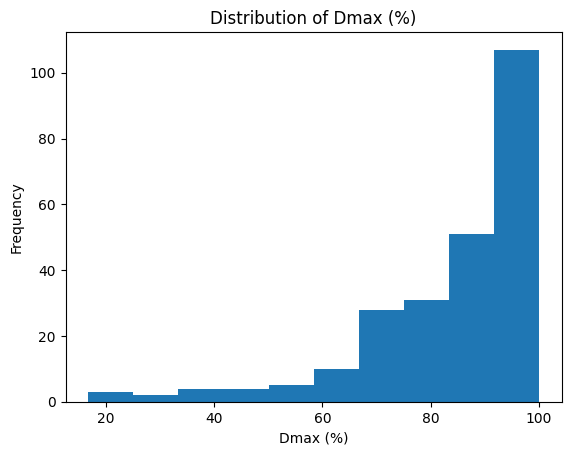

In [ ]:
plt.hist(dmax.values, bins=10)
plt.xlabel('Dmax (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Dmax (%)')
plt.plot()

Notice that Dmax is represented as a percentage. For now, let's continue with regressing on DC50. We are now ready to featurize!

In [9]:
# Let's predict DC50 properties for the time being
cleaned_data = protac_db.iloc[lognorm_dc50.index]
print('There are {} PROTAC samples.'.format(cleaned_data.shape[0]))

There are 599 PROTAC samples.


In [10]:
protac_smiles = cleaned_data['Smiles']
dc_vals = lognorm_dc50

## 3. Featurization

Let's featurize using CircularFingerprint which is incorporated in DeepChem! CircularFingerprint is a common featurizer for molecules that encode local information about each atom and their neighborhood. For more information, the reader is refered to [8](#8).

In [11]:
from rdkit import Chem
featurizer = dc.feat.CircularFingerprint(radius=4, chiral=True)

In [12]:
features = featurizer.featurize(protac_smiles)

In [13]:
# Let's initialize our dataset and perform splits
dataset = dc.data.NumpyDataset(X = features, y = dc_vals)

In [14]:
splitter = dc.splits.RandomSplitter()
train_mols, val_mols, test_mols = splitter.train_valid_test_split(dataset, seed=42)

## 4. Model deployment

We have successfully generated our train and test datasets. Let's now create a model to hopefully predict PROTAC degradation properties!

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

In [16]:
class BasicPROTACModel(nn.Module):
  def __init__(self, embedding_dim):
    super().__init__()
    self.fc1 = nn.Linear(embedding_dim, 256)
    self.fc2 = nn.Linear(256, 32)
    self.act1 = nn.ReLU()
    self.dropout = nn.Dropout(0.2)
    self.output = nn.Linear(32, 1)

  def forward(self, x):
    x = self.act1(self.fc1(x))
    x = self.dropout(self.act1(self.fc2(x)))
    output = self.output(x)
    return output

In [17]:
embedding_dim = train_mols.X.shape[1]
protac_model = BasicPROTACModel(embedding_dim)

In [18]:
criterion = dc.models.losses.L2Loss()
optimizer = dc.models.optimizers.Adam()

Let's now wrap everything together to instantiate a DeepChem model! Note that due to the small sample size, a smaller batch size actually helps performance.

In [19]:
# Let's log every train epoch
batch_size = 10
log_freq = int(len(train_mols) / batch_size +1)
protac_model = dc.models.torch_models.TorchModel(protac_model, loss=criterion, optimizer=optimizer, batch_size=10, log_frequency=log_freq)
param_count = sum(p.numel() for p in protac_model.model.parameters() if p.requires_grad)
print("There are {} trainable parameters".format(param_count))
protac_model.model

There are 532801 trainable parameters


BasicPROTACModel(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=32, bias=True)
  (act1): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (output): Linear(in_features=32, out_features=1, bias=True)
)

Let's define the validation function to prevent overfitting.

In [20]:
train_losses = []
val_losses = []
metric = [dc.metrics.Metric(dc.metrics.mean_squared_error)]

n_epochs=100
for i in range(n_epochs):
  protac_model.fit(train_mols, nb_epoch=1, all_losses=train_losses)

  # Validate on every other epoch
  if i % 2 == 0:
    loss = protac_model.evaluate(val_mols, metrics=metric)
    val_losses.append(loss['mean_squared_error'])

We can easily look at how the training went through plotting the recorded losses.

[]

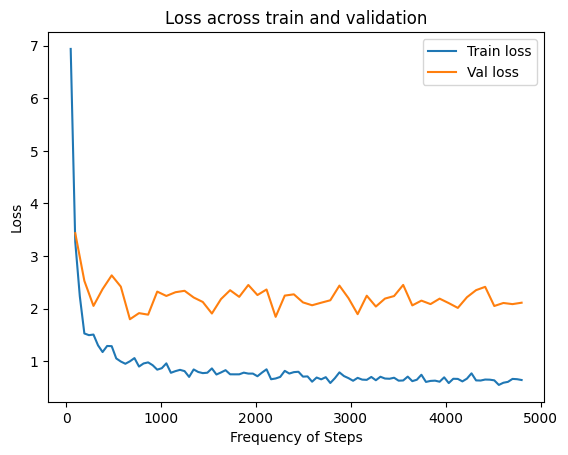

In [21]:
train_steps = [(i+1)*log_freq for i in range(len(train_losses))]
val_steps = [(i+1)*(log_freq*2) for i in range(len(val_losses))]
plt.plot(train_steps, train_losses, label='Train loss')
plt.plot(val_steps, val_losses, label='Val loss')
plt.legend()
plt.xlabel('Frequency of Steps')
plt.ylabel('Loss')
plt.title('Loss across train and validation')
plt.plot()

Let's now perform some inference on our test set to evaluate our model!

In [22]:
metrics = [dc.metrics.Metric(dc.metrics.mean_squared_error), dc.metrics.Metric(dc.metrics.pearsonr), dc.metrics.Metric(dc.metrics.pearson_r2_score)]
eval_metrics = protac_model.evaluate(test_mols, metrics)
preds = protac_model.predict(test_mols)

In [23]:
for k, v in eval_metrics.items():
  print('{}: {}'.format(k, v))

mean_squared_error: 3.5668503292586937
pearsonr: 0.8141917011032652
pearson_r2_score: 0.6629081261454288


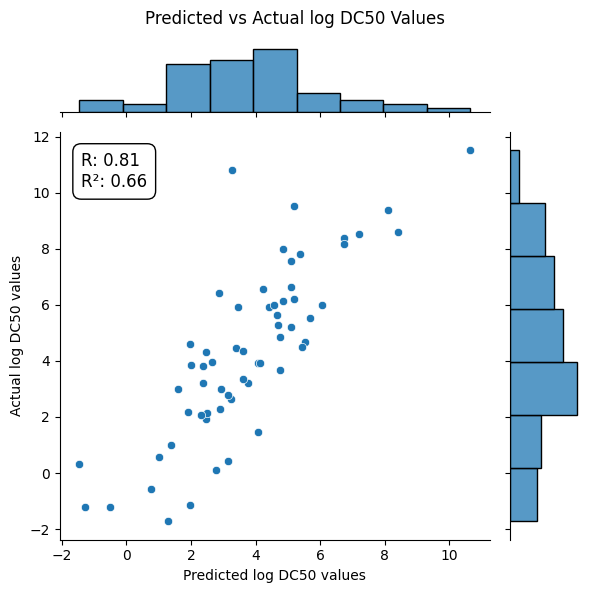

In [29]:
import seaborn as sns
preds_and_labels = np.concatenate((test_mols.y.reshape(60, 1), preds), axis=1)
pred_df = pd.DataFrame(preds_and_labels, columns=['Actual log DC50 values', 'Predicted log DC50 values'])
sns.jointplot(pred_df, x='Predicted log DC50 values', y='Actual log DC50 values')
plt.annotate(f"R: {eval_metrics['pearsonr']:.2f}\nR²: {eval_metrics['pearson_r2_score']:.2f}",
             xy=(0.05, 0.95),
             xycoords='axes fraction',
             ha='left',
             va='top',
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
# Set the title
plt.suptitle('Predicted vs Actual log DC50 Values')

# Adjust the position of the title to avoid overlap with the plot
plt.tight_layout()
plt.show()

## 5. References

<a name="1"></a> [1] Kelm, J.M., Pandey, D.S., Malin, E. et al. PROTAC’ing oncoproteins: targeted protein degradation for cancer therapy. Mol Cancer 22, 62 (2023). https://doi.org/10.1186/s12943-022-01707-5

<a name="2"></a> [2] Tu, Y., Chen, C., Pan, J., Xu, J., Zhou, Z. G., & Wang, C. Y. The Ubiquitin Proteasome Pathway (UPP) in the regulation of cell cycle control and DNA damage repair and its implication in tumorigenesis. International journal of clinical and experimental pathology 5, 8 (2012).

<a name="3"></a> [3] Sun, X., Gao, H., Yang, Y. et al. PROTACs: great opportunities for academia and industry. Sig Transduct Target Ther 4, 64 (2019). https://doi.org/10.1038/s41392-019-0101-6

<a name="4"></a> [4] Che Y, Gilbert AM, Shanmugasundaram V, Noe MC. Inducing protein-protein interactions with molecular glues. Bioorg Med Chem Lett 28, 15 (2018). https://doi.org/10.1016/j.bmcl.2018.04.046.

<a name="5"></a> [5] Békés, M., Langley, D.R. & Crews, C.M. PROTAC targeted protein degraders: the past is prologue. Nat Rev Drug Discov 21, 181–200 (2022). https://doi.org/10.1038/s41573-021-00371-6

<a name="6"></a> [6] Liu, Z., Hu, M., Yang, Y. et al. An overview of PROTACs: a promising drug discovery paradigm. Mol Biomed 3, 46 (2022). https://doi.org/10.1186/s43556-022-00112-0

<a name="7"></a> [7] Gaoqi Weng, Xuanyan Cai, Dongsheng Cao, Hongyan Du, Chao Shen, Yafeng Deng, Qiaojun He, Bo Yang, Dan Li, Tingjun Hou, PROTAC-DB 2.0: an updated database of PROTACs, Nucleic Acids Research, Volume 51, Issue D1, 6 January 2023, Pages D1367–D1372, https://doi.org/10.1093/nar/gkac946

<a name="8"></a> [8] Glem RC, Bender A, Arnby CH, Carlsson L, Boyer S, Smith J. Circular fingerprints: flexible molecular descriptors with applications from physical chemistry to ADME. IDrugs 9, 3 (2006).



# **Congratulations! Time to join the Community!**

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:



## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)

This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Discord

The DeepChem [Discord](https://discord.gg/7yKPrJjR3T) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!